In [37]:
# 库文件
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from skopt import gp_minimize
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
from sklearn.metrics.pairwise import rbf_kernel
import pandas as pd
import tensorflow as tf
import pickle
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
# 设置中文字体
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=12)  # 替换为你的中文字体文件路径
import sys
sys.path.append(r"C:\Users\haokw\Documents\GitHub\gaolu\MPC\高炉")
from collections import deque

import base 
# 基础库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
import os
import datetime
import pickle
# 机器学习库
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import rbf_kernel
# 数据归一化、逆归一化
from sklearn.preprocessing import MinMaxScaler
# 优化相关库
from skopt import gp_minimize
from scipy.optimize import minimize

# 深度学习库
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim

# 忽略警告
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# 中文字体设置
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=12)  # 替换为你的中文字体文件路径

# 其他路径设置
sys.path.append(r"C:\Users\haokw\Documents\GitHub\gaolu\MPC\高炉")

# 自定义模块
import base 


In [2]:
# # 读取Excel文件
# excel_path = f'C:\\Users\\haokw\\Documents\\GitHub\\gaolu\\up2\\data\\GAN_all_data.xlsx'
# df_sheet_params1 = pd.read_excel(excel_path, sheet_name='Sheet1') 
# df_sheet_params2 = pd.read_excel(excel_path, sheet_name='Sheet2') 
# df_sheet_params3 = pd.read_excel(excel_path, sheet_name='Sheet3') 
# df_sheet_params4 = pd.read_excel(excel_path, sheet_name='Sheet4') 
# df_sheet_params = pd.concat([df_sheet_params1,df_sheet_params2,df_sheet_params3,df_sheet_params4],axis=0)
# print('加载数据完成')

# 读取Excel文件
# excel_path = f'C:\\Users\\haokw\\Documents\\GitHub\\gaolu\\up2\\data\\GAN_all_data2.xlsx'
# df_sheet_params = pd.read_excel(excel_path, sheet_name='Sheet1') 

# excel_path = r'C:\Users\haokw\Documents\GitHub\gaolu\MPC\高炉\0数据处理\新输入输出模式\new\间隔1min平均.xlsx'
# df_sheet_params = pd.read_excel(excel_path, sheet_name='Sheet1') 

# # 替换成你的Excel文件路径
# file_path = f'C:\\Users\\haokw\\Documents\\GitHub\\VScode\\z综合信息\\数据\\data_s.xlsx'
# df1 = pd.read_excel(file_path,sheet_name='Sheet1')
# print('1')
# file_path = f'C:\\Users\\haokw\\Documents\\GitHub\\VScode\\z综合信息\\数据\\data_s2.xlsx'
# df2 = pd.read_excel(file_path,sheet_name='Sheet1')
# print('2')
# df3 = pd.read_excel(file_path,sheet_name='Sheet2')
# print('3')
# df4 = pd.read_excel(file_path,sheet_name='Sheet3')
# print('4')
# df_sheet_params = pd.concat([df1,df2,df3,df4],axis=0)
# 读取Excel文件
excel_path = r'C:\Users\haokw\Documents\GitHub\gaolu\up2\df_sheet_params_all_data.xlsx'
df_sheet_params = pd.read_excel(excel_path, sheet_name='Sheet1') 

print('加载数据完成')


加载数据完成


In [3]:
os.system(r'C:\Users\haokw\Desktop\11111.mp3')


0

In [4]:
# 检查 DataFrame 中是否包含 NaN 值
def check_if_NaN(data):
    print(data.shape)
    contains_nan = data.isna().any().any()
    if contains_nan:
        print("数据包含 NaN 值")
    else:
        print("数据不包含 NaN 值")
        
# check_if_NaN(df_sheet_yuansu)
check_if_NaN(df_sheet_params)



(284940, 37)
数据不包含 NaN 值


In [5]:
如果额


NameError: name '如果额' is not defined

In [24]:
df_sheet_params_part = df_sheet_params.iloc[::1,:].reset_index().dropna()#返回第一行

check_if_NaN(df_sheet_params_part)


(284940, 38)
数据不包含 NaN 值


In [25]:
df_sheet_params_part.columns


Index(['level_0', 'index', '时间', '富氧率', '透气性指数', 'CO', 'H2', 'CO2', '标准风速',
       '富氧流量', '冷风流量', '鼓风动能', '炉腹煤气量', '炉腹煤气指数', '理论燃烧温度', '顶压', '顶压2', '顶压3',
       '顶压4', '富氧压力', '冷风压力', '冷风压力2', '全压差', '热风压力', '热风压力2', '实际风速', '冷风温度',
       '热风温度', '顶温东北', '顶温西南', '顶温西北', '顶温东南', '顶温下降管', '阻力系数', '鼓风湿度',
       '设定喷煤量', '本小时实际喷煤量', '上小时实际喷煤量'],
      dtype='object')

In [26]:
input_term = ['富氧流量', '冷风流量', '热风压力', '热风温度']
# input_term = ['富氧流量', '冷风流量', '热风压力', '设定喷煤量']
output_term = ['铁水温度[MIT]', '铁水硅含量[SI]']
time_term= '时间'


['富氧流量', '冷风流量', '热风压力', '热风温度']
原始数据行数: 284940
删除异常值后的数据行数: 284940


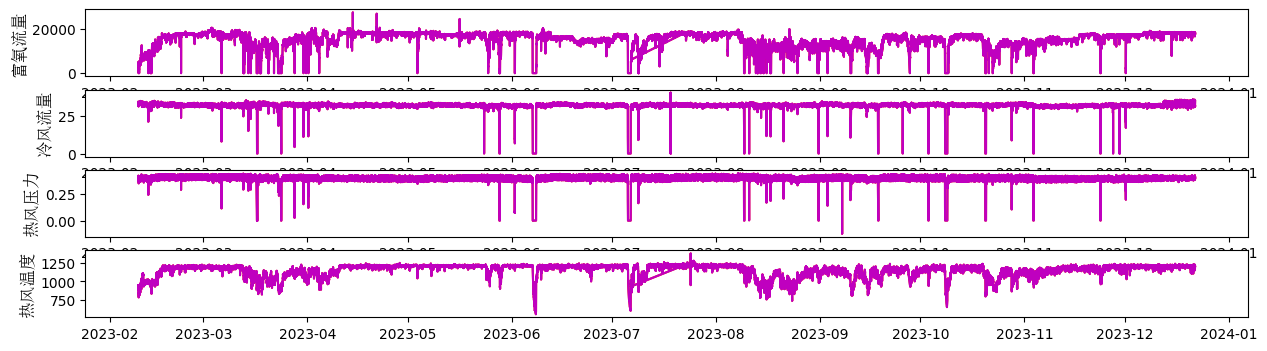

In [53]:
# 处理异常值

# 创建数据框副本以避免修改原始数据

df_sheet_X = df_sheet_params_part
df_sheet_X_process = df_sheet_X.copy()


def IQR_process(df_IQR, columns):
    df_IQR = df_IQR
    columns = columns

    print(columns)      # 获取数据框的所有列名
    outlier_indices = set()  # 用于存储异常值的行索引

    # 1. 分别处理每个变量
    for column in columns:
        # 计算描述性统计
        stats = df_IQR[column].describe()

        # 计算IQR（四分位距）以及上下须的范围
        Q1 = stats['25%']
        Q3 = stats['75%']
        IQR = Q3 - Q1
        lower_whisker = Q1 - 50 * IQR
        upper_whisker = Q3 + 50 * IQR
        # if column == '热风压力':
        #     lower_whisker = Q1 - 2 * IQR
        #     upper_whisker = Q3 + 1.5 * IQR

        # # 绘制箱线图
        # plt.figure(figsize=(8, 6))
        # sns.boxplot(data=df_IQR[column])
        # plt.title(f'Boxplot of {column}', fontproperties=font)
        # plt.xlabel('Feature', fontproperties=font)
        # plt.ylabel('Value', fontproperties=font)
        # plt.show()

        # 查找异常值的索引
        outliers = df_IQR[(df_IQR[column] < lower_whisker) | 
                            (df_IQR[column] > upper_whisker)].index
        outlier_indices.update(outliers)

        # # 打印统计信息和异常值范围
        # print(f"列: {column}")
        # print(f"第一四分位数 (Q1): {Q1}")
        # print(f"第三四分位数 (Q3): {Q3}")
        # print(f"下须 (lower whisker): {lower_whisker}")
        # print(f"上须 (upper whisker): {upper_whisker}")
        # print(f"找到的异常值索引: {list(outliers)}")

        
        # print(f"异常值数量: {len(outliers)}")
        # print(f"总数: {len(df_IQR[column])}")

        # print(f"异常值比例: {len(outliers)/len(df_IQR[column])}\n")

    # 2. 删除所有异常值
    df_cleaned = df_IQR.drop(index=outlier_indices)
    # 重新设置索引，使索引从 0 开始，并丢弃旧索引
    df_cleaned.reset_index(drop=True, inplace=True)
    # 输出处理后的数据框信息
    print(f"原始数据行数: {df_IQR.shape[0]}")
    print(f"删除异常值后的数据行数: {df_cleaned.shape[0]}")

    # 你可以继续对 df_cleaned 进行后续处理



    return df_cleaned


df_cleaned_X = IQR_process(df_sheet_X_process, input_term)

# print(np.max(df_cleaned_Y['铁水温度[MIT]']))
# print(np.min(df_cleaned_Y['铁水温度[MIT]']))
# print(np.max(df_cleaned_Y['铁水硅含量[SI]']))
# print(np.min(df_cleaned_Y['铁水硅含量[SI]']))


# 画出数据
def plot_subplot(data_x_yuan,data_y_yuan,data_x,data_y,column):
    plt.plot(data_x_yuan,data_y_yuan,'r-')
    plt.plot(data_x,data_y,'m-')
    # plt.xlabel(time_term, fontproperties=font)  # 使用中文标签
    plt.ylabel(column, fontproperties=font)  # 使用中文标签
    # 使用中文标签


    
plt.figure(figsize=(15, 4))
for idx, column in enumerate(input_term):
    plt.subplot(len(input_term), 1, idx+1)
    plot_subplot(   df_sheet_X[time_term].values,   df_sheet_X[column].values, 
                    df_cleaned_X[time_term].values, df_cleaned_X[column].values,
                    column                )



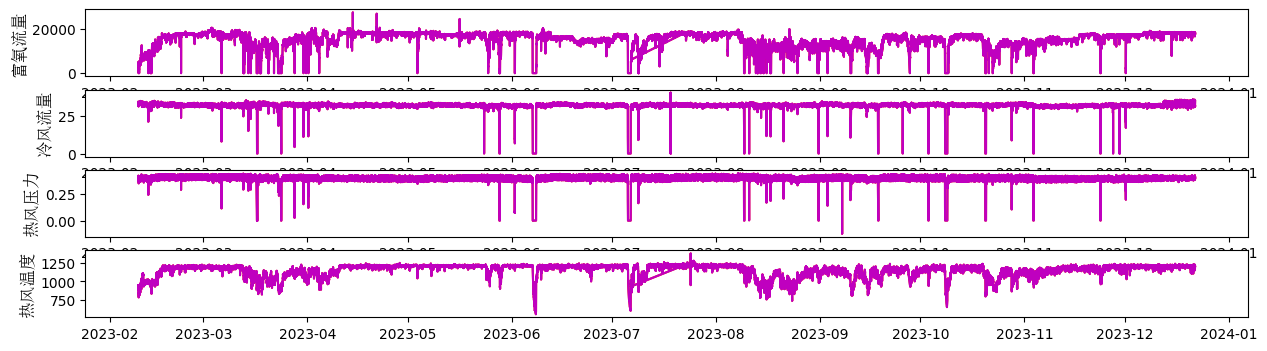

In [54]:
# 异常数据处理-处理前后对比
# 创建数据框副本以避免修改原始数据
# df_sheet_yuansu_process = df_sheet_yuansu.copy()
df_sheet_params_process = df_cleaned_X.copy()
# 定义一个函数，用前后两个值的差值按照距离进行加权替换异常值
def replace_outliers_with_weighted_diff(x, y):
    # 计算列的中位数
    median_value = y.median()
    # 检测异常值的索引
    outliers_index = (y - median_value).abs() > 2.5* y.std()
    
    # 遍历异常值的索引
    for idx in outliers_index[outliers_index].index:
        # 获取异常值前一个和后一个值的索引
        prev_idx = idx - 1 if idx - 1 >= 0 else idx
        next_idx = idx + 1 if idx + 1 < len(y) else idx
        # 计算当前 x 与前后两个 x 的距离
        dist_prev = abs(x[idx] - x[prev_idx])
        dist_next = abs(x[next_idx] - x[idx])
        total_dist = dist_prev + dist_next
        # 计算权重
        weight_prev = dist_next / total_dist
        weight_next = dist_prev / total_dist
        # 计算前后两个值的差值
        diff = y[next_idx] - y[prev_idx]
        # 根据权重进行插值
        interpolated_value = y[prev_idx] + weight_prev * diff
        # 用插值结果替代异常值
        y[idx] = interpolated_value

# 画出数据
def plot_subplot(data_x,data_y_yuan,data_y,column):
    plt.plot(data_x,data_y_yuan,'r-')
    plt.plot(data_x,data_y,'m-')
    # plt.xlabel(time_term, fontproperties=font)  # 使用中文标签
    plt.ylabel(column, fontproperties=font)  # 使用中文标签
    # 使用中文标签


# 对指定列应用替代异常值的函数
# 对指定列应用替代异常值的函数
# replace_outliers_with_weighted_diff(df_sheet_params_process[time_term], df_sheet_params_process[input_term[0]])
# replace_outliers_with_weighted_diff(df_sheet_params_process[time_term], df_sheet_params_process[input_term[1]])
# replace_outliers_with_weighted_diff(df_sheet_params_process[time_term], df_sheet_params_process[input_term[2]])
# replace_outliers_with_weighted_diff(df_sheet_params_process[time_term], df_sheet_params_process[input_term[3]])
# replace_outliers_with_weighted_diff(df_sheet_params_process[time_term], df_sheet_params_process[input_term[4]])
# replace_outliers_with_weighted_diff(df_sheet_params_process[time_term], df_sheet_params_process[input_term[5]])
# replace_outliers_with_weighted_diff(df_sheet_params_process[time_term], df_sheet_params_process[input_term[6]])

# replace_outliers_with_weighted_diff(df_sheet_yuansu_process[time_term], df_sheet_yuansu_process[output_term[0]])
# replace_outliers_with_weighted_diff(df_sheet_yuansu_process[time_term], df_sheet_yuansu_process[output_term[1]])

plt.figure(figsize=(15, 4))
for idx, column in enumerate(input_term):
    plt.subplot(len(input_term), 1, idx+1)
    plot_subplot(df_sheet_params_process[time_term].values,df_cleaned_X[column].values,df_sheet_params_process[column].values,column)

# plt.figure(figsize=(15, 2))
# for idx, column in enumerate(output_term):
#     plt.subplot(len(output_term), 1, idx+1)
#     plot_subplot(df_sheet_yuansu_process[time_term].values,df_sheet_yuansu[column].values,df_sheet_yuansu_process[column].values,column)




In [55]:
# 数据归一化、逆归一化
from sklearn.preprocessing import MinMaxScaler

# 将数据存储为字典，每个键对应一列数据
original_data_dict = {
    input_term[0]:   df_sheet_params_process[input_term[0]].values,
    input_term[1]:   df_sheet_params_process[input_term[1]].values,
    input_term[2]:   df_sheet_params_process[input_term[2]].values,
    input_term[3]:   df_sheet_params_process[input_term[3]].values
    # input_term[4]:   df_sheet_params_process[input_term[4]].values,
    # input_term[5]:   df_sheet_params_process[input_term[5]].values,
    # input_term[6]:   df_sheet_params_process[input_term[6]].values,
    # output_term[0]:  df_sheet_yuansu_process[output_term[0]].values,
    # output_term[1]:  df_sheet_yuansu_process[output_term[1]].values
}

# 初始化缩放器
scalers = {}

# 进行拟合
for column, data in original_data_dict.items():
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler.fit(data.reshape(-1, 1))  # 保证数据是列向量
    scalers[column] = scaler

# 进行归一化
normalized_data_dict = {}
for column, scaler in scalers.items():
    normalized_data_dict[column] = scaler.transform(original_data_dict[column].reshape(-1, 1)).flatten()

# 进行反归一化
original_data_dict = {}
for column, scaler in scalers.items():
    original_data_dict[column] = scaler.inverse_transform(normalized_data_dict[column].reshape(-1, 1)).flatten()





In [56]:
# 保存original_data_dict到文件
with open('original_data_dict.pkl', 'wb') as f:
    pickle.dump(original_data_dict, f)

print("Data saved successfully.")


Data saved successfully.


GAN

In [ ]:
# 绘制叠加的散点图矩阵。
def plot_scatter_matrix(X_df_normal, X_df_normal_index_gaolu, figsize=(10, 8),font=font, save_path=None):
    """
    绘制叠加的散点图矩阵。

    参数:
    X_df_normal (DataFrame): 第一组数据。
    X_df_normal_index_gaolu (DataFrame): 第二组数据。
    font (FontProperties, optional): 字体属性，用于设置标签的字体。
    """
    # 设置颜色和标记
    color_left = 'blue'
    color_right = 'red'
    marker_left = '.'
    marker_right = '.'

    # 设置数据
    df_left = X_df_normal  # 第一组数据
    df_right = X_df_normal_index_gaolu  # 第二组数据

    # 绘制叠加的散点图矩阵
    plt.figure(figsize = figsize)
    num_cols = len(df_left.columns)
    
    for i, col1 in enumerate(df_left.columns):
        for j, col2 in enumerate(df_left.columns):
            ax = plt.subplot(num_cols, num_cols, i * num_cols + j + 1)
            
            if i != j:
                ax.scatter(df_left[col1], df_left[col2], color=color_left, alpha=0.5, marker=marker_left, label='Left Data' if i == 0 and j == 1 else "")
                ax.scatter(df_right[col1], df_right[col2], color=color_right, alpha=0.5, marker=marker_right, label='Right Data' if i == 0 and j == 1 else "")
                ax.set_xlim([-1, 1])
                ax.set_ylim([-1, 1])
            else:
                ax.hist(df_left[col1], bins=50, alpha=0.5, color=color_left)
                ax.hist(df_right[col1], bins=50, alpha=0.5, color=color_right)
                ax.set_xlim([-1, 1])

            if i == num_cols - 1:
                ax.set_xlabel(col2, fontproperties=font)
            if j == 0:
                ax.set_ylabel(col1, fontproperties=font)

    # # 添加图例
    # plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
    # 手动添加图例
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.5, 1))

    # 添加标题并调整布局
    plt.suptitle('Overlaid Scatter Matrix of Features', y=1.02)
    plt.tight_layout()
    
    # 如果提供了保存路径，则保存图像
    if save_path:
        plt.savefig(save_path)
        plt.close()  # 关闭当前的图像，以节省内存
    else:
        plt.show()  # 否则显示图像






In [ ]:
# 绘制散点图矩阵
# 转换为DataFrame
print('高炉部分数据')


# 转换为DataFrame
print('全部数据')
X_df_normal = pd.DataFrame(normalized_data_dict, columns=input_term)
print(X_df_normal.shape)
check_if_NaN(X_df_normal)


# 绘制散点图矩阵
plot_scatter_matrix(X_df_normal, X_df_normal, font=font, figsize=(10, 8))


In [ ]:
# 在三角形内部生成随机点
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.path import Path

# 设置随机种子
np.random.seed(42)

def generate_triangle_data(vertices, num_samples):
    # 创建三角形的路径
    triangle_path = Path(vertices)
    
    # 初始化点
    points = []
    
    # 在三角形内部生成随机点
    while len(points) < num_samples:
        # 生成随机点
        random_point = np.random.rand(2)
        
        # 检查点是否在三角形内部
        if triangle_path.contains_points([random_point]):
            points.append(random_point)
    
    return np.array(points)

# 定义三角形顶点
vertices = np.array([
    [0, 0],  # 顶点A
    [1, 0],  # 顶点B
    [0.5, 1]  # 顶点C
])

# 生成数据
num_samples = 10000
data_test = generate_triangle_data(vertices, num_samples)

# # 可视化数据
# plt.figure(figsize=(8, 8))
# plt.fill(vertices[:, 0], vertices[:, 1], 'lightgray', edgecolor='black', alpha=0.5)  # 填充三角形
# plt.scatter(data_test[:, 0], data_test[:, 1], c='blue', alpha=0.5, s=1)
# plt.title('Random Points Inside a Triangle')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.axis('equal')
# plt.show()


# 将数据转换为 DataFrame
data_test = pd.DataFrame(data_test, columns=['X', 'Y'])


In [ ]:
# GAN超参数  训练数据


# 将历史数据转换为 PyTorch 张量
data_item = X_df_normal
# data_item = data_test

data = torch.tensor(data_item.values, dtype=torch.float32)
df_GAN = data_item
test_sample_num = data.shape[0]



z_dim = 4  # 随机噪声维度
data_dim = data.shape[1]  # 数据维度，4
learning_rate = 0.0002
num_epochs = 200
n_critic = 5  # 每次更新生成器前，更新 Critic 的次数

print_piture_d = 10

# 设置数据加载器
batch_size = 512
data_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)




In [ ]:
# W-GAN模型定义和训练
# WGAN的生成器
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(True),
            nn.Linear(128, 256),
            nn.ReLU(True),
            nn.Linear(256, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

# WGAN的Critic
class Critic(nn.Module):
    def __init__(self, input_dim):
        super(Critic, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        return self.model(x)

# 权重裁剪
def weight_clipping(critic, clip_value=0.01):
    for param in critic.parameters():
        param.data.clamp_(-clip_value, clip_value)

# WGAN训练
def train_wgan(generator, critic, data_loader, num_epochs, z_dim, clip_value, n_critic, optimizer_G, optimizer_C, output_dir):
    output_dir = r"data\train_output_picture\WGAN_training_output2"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    for epoch in range(num_epochs):
        for real_data in data_loader:
            batch_size = real_data.size(0)

            # 更新 Critic
            for _ in range(n_critic):
                z = torch.randn(batch_size, z_dim)
                fake_data = generator(z)

                # 计算 Critic 的损失（Wasserstein 距离）
                real_output = critic(real_data)
                fake_output = critic(fake_data.detach())
                c_loss = -torch.mean(real_output) + torch.mean(fake_output)

                optimizer_C.zero_grad()
                c_loss.backward()
                optimizer_C.step()

                # 对 Critic 权重进行裁剪
                weight_clipping(critic, clip_value)

            # 更新生成器
            z = torch.randn(batch_size, z_dim)
            fake_data = generator(z)
            fake_output = critic(fake_data)
            g_loss = -torch.mean(fake_output)

            optimizer_G.zero_grad()
            g_loss.backward()
            optimizer_G.step()

        print(f"WGAN_training Epoch [{epoch}/{num_epochs}], c_loss: {c_loss.item():.4f}, g_loss: {g_loss.item():.4f}")

        if epoch % print_piture_d == print_piture_d-1:
            # 生成一些数据
            z = torch.randn(test_sample_num, z_dim)
            generated_data = generator(z).detach().numpy()

            # 将生成的数据转换为 DataFrame
            generated_df = pd.DataFrame(generated_data, columns=df_GAN.columns)

            # 获取当前时间
            current_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
            # 构建保存路径和文件名
            filename = f"{current_time}_WGAN_Epoch_{epoch+1}_c_loss_{c_loss.item():.4f}_g_loss_{g_loss.item():.4f}.png"
            save_path = os.path.join(output_dir, filename)

            # 可视化生成的数据分布（你可以实现自己的可视化函数）
            plot_scatter_matrix(df_GAN, generated_df, figsize=(10, 8), font=font, save_path=save_path)


In [ ]:
# 初始化WGAN  训练
wgan_generator = Generator(input_dim=z_dim, output_dim=data_dim)
wgan_critic = Critic(input_dim=data_dim)
# 初始化优化器
optimizer_G = optim.Adam(wgan_generator.parameters(), lr=learning_rate, betas=(0.2, 0.999))
optimizer_C = optim.Adam(wgan_critic.parameters(), lr=learning_rate, betas=(0.2, 0.999))

# 训练WGAN
train_wgan(wgan_generator, wgan_critic, data_loader, 
                num_epochs=num_epochs, z_dim=z_dim, clip_value=0.01, 
                n_critic = 5, 
                optimizer_G=optimizer_G, optimizer_C=optimizer_C, 
                output_dir="wgan_outputs")



# 保存模型参数
def save_model(generator, discriminator, output_dir, epoch):
        # 创建保存目录（如果不存在）
        os.makedirs(output_dir, exist_ok=True)

        # 定义文件名
        generator_filename = os.path.join(output_dir, f"generator.pth")
        discriminator_filename = os.path.join(output_dir, f"discriminator.pth")

        # 保存生成器的模型参数
        torch.save(generator.state_dict(), generator_filename)
        print(f"Generator model saved to {generator_filename}")

        # 保存判别器的模型参数
        torch.save(discriminator.state_dict(), discriminator_filename)
        print(f"Discriminator model saved to {discriminator_filename}")

save_model(wgan_generator, wgan_critic, 
        output_dir=r"data\model_params\wgan_model_all_data", 
        epoch=num_epochs)


In [ ]:
# 生成样本测试
z = torch.randn(test_sample_num, z_dim)
print(z.shape)

generated_data = wgan_generator(z).detach().numpy()
print(generated_data.shape)

# 将生成的数据转换为 DataFrame
generated_df = pd.DataFrame(generated_data, columns=df_GAN.columns)

# 可视化生成的数据分布（你可以实现自己的可视化函数）
plot_scatter_matrix(df_GAN, generated_df, figsize=(10, 8), font=font)


In [ ]:
# LS-GAN模型定义和训练
class LSGANGenerator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LSGANGenerator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(True),
            nn.Linear(128, 256),
            nn.ReLU(True),
            nn.Linear(256, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

# LSGAN的判别器
class LSGANDiscriminator(nn.Module):
    def __init__(self, input_dim):
        super(LSGANDiscriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        return self.model(x)

# # LSGAN的损失函数
# def generator_loss(fake_output):
#     return torch.mean((fake_output - 1) ** 2)

# def discriminator_loss(real_output, fake_output):
#     real_loss = torch.mean((real_output - 1) ** 2)
#     fake_loss = torch.mean(fake_output ** 2)
#     return real_loss + fake_loss


# 定义LSGAN损失函数
def generator_loss(fake_output, generated_data, real_data):
    # LS-GAN 原始损失
    lsgan_loss = torch.mean((fake_output - 1) ** 2)
    # 生成数据与真实数据的MSE匹配损失
    mse_loss = torch.mean((generated_data - real_data) ** 2)
    return lsgan_loss + mse_loss

def discriminator_loss(real_output, fake_output):
    real_loss = torch.mean((real_output - 1) ** 2)
    fake_loss = torch.mean(fake_output ** 2)
    return real_loss + fake_loss



# LSGAN训练
def train_lsgan(generator, discriminator, data_loader, num_epochs, z_dim, optimizer_G, optimizer_D, output_dir):
    output_dir = r"data\train_output_picture\LS-GAN_training_output2"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    for epoch in range(num_epochs):
        for real_data in data_loader:
            batch_size = real_data.size(0)

            # 生成数据
            z = torch.randn(batch_size, z_dim)
            fake_data = generator(z)

            # 判别器前向传播
            real_output = discriminator(real_data)
            fake_output = discriminator(fake_data.detach())

            # 计算判别器损失
            d_loss = discriminator_loss(real_output, fake_output)
            optimizer_D.zero_grad()
            d_loss.backward()
            optimizer_D.step()

            # 生成器前向传播
            fake_output = discriminator(fake_data)

            # 计算生成器损失
            g_loss = generator_loss(fake_output, fake_data, real_data)
            optimizer_G.zero_grad()
            g_loss.backward()
            optimizer_G.step()

        print(f"LS-GAN_training Epoch [{epoch}/{num_epochs}], D_loss: {d_loss.item():.4f}, G_loss: {g_loss.item():.4f}")

        if epoch % print_piture_d == print_piture_d-1:
            # 生成数据test_sample_num
            z = torch.randn(test_sample_num, z_dim)
            generated_data = generator(z).detach().numpy()

            # 将生成的数据转换为 DataFrame
            generated_df = pd.DataFrame(generated_data, columns=df_GAN.columns)

            # 获取当前时间
            current_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

            # 构建保存路径和文件名
            filename = f"{current_time}_LSGAN_Epoch_{epoch+1}_D_loss_{d_loss.item():.4f}_G_loss_{g_loss.item():.4f}.png"
            save_path = os.path.join(output_dir, filename)

            # 可视化生成的数据分布（你可以实现自己的可视化函数）
            plot_scatter_matrix(df_GAN, generated_df, figsize=(10, 8), font=font, save_path=save_path)


In [ ]:
# 初始化LSGAN优化器  训练
lsgan_generator = LSGANGenerator(input_dim=z_dim, output_dim=data_dim)
lsgan_discriminator = LSGANDiscriminator(input_dim=data_dim)

optimizer_G = optim.Adam(lsgan_generator.parameters(), lr=learning_rate, betas=(0.2, 0.999))
optimizer_D = optim.Adam(lsgan_discriminator.parameters(), lr=learning_rate, betas=(0.2, 0.999))

# 使用WGAN生成的数据作为输入进行LSGAN训练
train_lsgan(lsgan_generator, lsgan_discriminator, data_loader, 
                num_epochs=num_epochs, z_dim=z_dim, 
                optimizer_G=optimizer_G, optimizer_D=optimizer_D, 
                output_dir="lsgan_outputs")



# 保存模型参数
def save_model(generator, discriminator, output_dir, epoch):
        # 创建保存目录（如果不存在）
        os.makedirs(output_dir, exist_ok=True)

        # 定义文件名
        generator_filename = os.path.join(output_dir, f"generator.pth")
        discriminator_filename = os.path.join(output_dir, f"discriminator.pth")

        # 保存生成器的模型参数
        torch.save(generator.state_dict(), generator_filename)
        print(f"Generator model saved to {generator_filename}")

        # 保存判别器的模型参数
        torch.save(discriminator.state_dict(), discriminator_filename)
        print(f"Discriminator model saved to {discriminator_filename}")
save_model(lsgan_generator, lsgan_discriminator, 
        output_dir=r"data\model_params\lsgan_model_2", 
        epoch=num_epochs)



In [ ]:
# 生成样本测试
z = torch.randn(test_sample_num, z_dim)
print(z.shape)

generated_data = lsgan_generator(z).detach().numpy()
print(generated_data.shape)

# 将生成的数据转换为 DataFrame
generated_df = pd.DataFrame(generated_data, columns=df_GAN.columns)

# 可视化生成的数据分布（你可以实现自己的可视化函数）
plot_scatter_matrix(df_GAN, generated_df, figsize=(10, 8), font=font)


In [ ]:
# WGAN的生成器   初始化   加载生成器参数  获取 PyTorch 模型参数  构建numpy版本  初始化numpy生成器

# 初始化生成器和判别器
wgan_generator_item = Generator(input_dim=z_dim, output_dim=data_dim)


# 加载生成器参数
generator_path = r"data\model_params\wgan_model_2\wgan_generator_epoch_200.pth"
wgan_generator_item.load_state_dict(torch.load(generator_path))
wgan_generator_item.eval()  # 切换到评估模式
print(f"Generator model loaded from {generator_path}")


# 假设 lsgan_generator_item 已经是训练好的模型
def extract_pytorch_params(model):
    params = {}
    for name, param in model.named_parameters():
        params[name] = param.data.numpy()
    return params
# 获取 PyTorch 模型参数
wgan_generator_item_params = extract_pytorch_params(wgan_generator_item)



# 构建numpy版本
class WGANGeneratorNumpy:
    def __init__(self, input_dim, output_dim, params):
        self.input_dim = input_dim
        self.output_dim = output_dim
        
        # 使用从 PyTorch 模型中提取的参数初始化
        self.W1 = params['model.0.weight'].T  # 转置以匹配 numpy 矩阵乘法
        self.b1 = params['model.0.bias']
        
        self.W2 = params['model.2.weight'].T
        self.b2 = params['model.2.bias']
        
        self.W3 = params['model.4.weight'].T
        self.b3 = params['model.4.bias']
    
    def relu(self, x):
        return np.maximum(0, x)
    
    def tanh(self, x):
        return np.tanh(x)
    
    def forward(self, x):
        z1 = np.dot(x, self.W1) + self.b1
        a1 = self.relu(z1)
        
        z2 = np.dot(a1, self.W2) + self.b2
        a2 = self.relu(z2)
        
        z3 = np.dot(a2, self.W3) + self.b3
        output = self.tanh(z3)
        
        return output
    


# 初始化numpy生成器
wgan_generator_numpy = WGANGeneratorNumpy(z_dim, data_dim, wgan_generator_item_params)



print('参数已迁移')




In [ ]:
# LSGAN的生成器   初始化   加载生成器参数  获取 PyTorch 模型参数  构建numpy版本  初始化numpy生成器

# 初始化生成器和判别器
lsgan_generator_item = LSGANGenerator(input_dim=z_dim, output_dim=data_dim)


# 加载生成器参数
generator_path = r"data\model_params\lsgan_model_2\lsgan_generator_epoch_200.pth"
lsgan_generator_item.load_state_dict(torch.load(generator_path))
lsgan_generator_item.eval()  # 切换到评估模式
print(f"Generator model loaded from {generator_path}")


# 假设 lsgan_generator_item 已经是训练好的模型
def extract_pytorch_params(model):
    params = {}
    for name, param in model.named_parameters():
        params[name] = param.data.numpy()
    return params
# 获取 PyTorch 模型参数
lsgan_generator_item_params = extract_pytorch_params(lsgan_generator_item)



# 构建numpy版本
class LSGANGeneratorNumpy:
    def __init__(self, input_dim, output_dim, params):
        self.input_dim = input_dim
        self.output_dim = output_dim
        
        # 使用从 PyTorch 模型中提取的参数初始化
        self.W1 = params['model.0.weight'].T  # 转置以匹配 numpy 矩阵乘法
        self.b1 = params['model.0.bias']
        
        self.W2 = params['model.2.weight'].T
        self.b2 = params['model.2.bias']
        
        self.W3 = params['model.4.weight'].T
        self.b3 = params['model.4.bias']
    
    def relu(self, x):
        return np.maximum(0, x)
    
    def tanh(self, x):
        return np.tanh(x)
    
    def forward(self, x):
        z1 = np.dot(x, self.W1) + self.b1
        a1 = self.relu(z1)
        
        z2 = np.dot(a1, self.W2) + self.b2
        a2 = self.relu(z2)
        
        z3 = np.dot(a2, self.W3) + self.b3
        output = self.tanh(z3)
        
        return output
    


# 初始化numpy生成器
lsgan_generator_numpy = LSGANGeneratorNumpy(z_dim, data_dim, lsgan_generator_item_params)



print('参数已迁移')




In [ ]:
# generated_numpy = wgan_generator_numpy
# generated_torch = wgan_generator

generated_numpy = lsgan_generator_numpy
generated_torch = lsgan_generator


In [ ]:
# 验证环节
def series2U(z, M, generator, scalers_X, input_term, isprint = True):
    if(isprint):print(z.shape)

    # 将 z 重新整理成 (M, z_dim) 的二维数组
    z_reshaped = z.reshape(M, z_dim)

    # 将 numpy 数组转换为 tensor，指定 dtype 为 float32
    z_tensor = torch.from_numpy(z_reshaped).float()
    if(isprint):print(z_tensor.shape)

    # z_tensor = torch.randn(2, z_dim)
    generated_data = generator(z_tensor).detach().numpy()

    if(isprint):print(generated_data.shape)
    if(isprint):print(generated_data)

    # 分别提取 U1, U2, U3, U4
    U1 = generated_data[:, 0]
    U2 = generated_data[:, 1]
    U3 = generated_data[:, 2]
    U4 = generated_data[:, 3]

    # 将 U1, U2, U3, U4 连接成一个序列
    sequence = np.concatenate((U1, U2, U3, U4))

    if(isprint):print("U1:", U1)
    if(isprint):print("U2:", U2)
    if(isprint):print("U3:", U3)
    if(isprint):print("U4:", U4)
    if(isprint):print("Connected sequence:", sequence)


    U1_inverse = scalers_X[input_term[0]].inverse_transform(U1.reshape(-1, 1)).flatten()
    U2_inverse = scalers_X[input_term[1]].inverse_transform(U2.reshape(-1, 1)).flatten()
    U3_inverse = scalers_X[input_term[2]].inverse_transform(U3.reshape(-1, 1)).flatten()
    U4_inverse = scalers_X[input_term[3]].inverse_transform(U4.reshape(-1, 1)).flatten()

    if(isprint):print("U1_inverse:", U1_inverse)
    if(isprint):print("U2_inverse:", U2_inverse)
    if(isprint):print("U3_inverse:", U3_inverse)
    if(isprint):print("U4_inverse:", U4_inverse)

    return sequence


def series2U_numpy(z, M, generator, scalers_X, input_term, isprint = True):

    if(isprint):print(z.shape)

    # 生成一些随机数据进行测试
    x =  z.reshape(M, z_dim)

    # 前向传播
    generated_data = generator.forward(x)

    if(isprint):print("Generated data shape:", generated_data.shape)
    if(isprint):print("Generated data:\n", generated_data)


    # 分别提取 U1, U2, U3, U4
    U1 = generated_data[:, 0]
    U2 = generated_data[:, 1]
    U3 = generated_data[:, 2]
    U4 = generated_data[:, 3]

    # 将 U1, U2, U3, U4 连接成一个序列
    sequence = np.concatenate((U1, U2, U3, U4))

    if(isprint):print("U1:", U1)
    if(isprint):print("U2:", U2)
    if(isprint):print("U3:", U3)
    if(isprint):print("U4:", U4)
    if(isprint):print("Connected sequence:", sequence)

    U1_inverse = scalers_X[input_term[0]].inverse_transform(U1.reshape(-1, 1)).flatten()
    U2_inverse = scalers_X[input_term[1]].inverse_transform(U2.reshape(-1, 1)).flatten()
    U3_inverse = scalers_X[input_term[2]].inverse_transform(U3.reshape(-1, 1)).flatten()
    U4_inverse = scalers_X[input_term[3]].inverse_transform(U4.reshape(-1, 1)).flatten()

    if(isprint):print("U1_inverse:", U1_inverse)
    if(isprint):print("U2_inverse:", U2_inverse)
    if(isprint):print("U3_inverse:", U3_inverse)
    if(isprint):print("U4_inverse:", U4_inverse)

    return sequence


# 定义 M 和 z_dim
test_size_generated_data = 3      # 样本数量

# 使用 numpy 生成标准正态分布的随机数，形状为 (z_dim * M,)
z = np.random.randn(z_dim * test_size_generated_data)
generated_data          = series2U      (z,test_size_generated_data,generated_torch, scalers, input_term, isprint=False)
generated_data_numpy    = series2U_numpy(z,test_size_generated_data,generated_numpy ,scalers, input_term, isprint=False)

print("验证原模型与numpy模型的输出是否一致：")
result_d_state = np.fabs(generated_data-generated_data_numpy)<1e-6
# print(result_d_state)
print('总数量：',test_size_generated_data*4,',错误数量：',np.sum(result_d_state==False),'，正确数量：',np.sum(result_d_state==True))


In [ ]:
def series2U_numpy_in_control(z, M, generator_numpy,scalers_X, scalers, input_term, isprint = True):

    if(isprint):print(z.shape)

    # 生成一些随机数据进行测试
    x =  z.reshape(M, z_dim)

    # 前向传播
    generated_data = generator_numpy.forward(x)

    if(isprint):print("Generated data shape:", generated_data.shape)
    if(isprint):print("Generated data:\n", generated_data)


    # 分别提取 U1, U2, U3, U4
    U1 = generated_data[:, 0]
    U2 = generated_data[:, 1]
    U3 = generated_data[:, 2]
    U4 = generated_data[:, 3]

    if(isprint):print("U1:", U1)
    if(isprint):print("U2:", U2)
    if(isprint):print("U3:", U3)
    if(isprint):print("U4:", U4)

    U1_inverse = scalers_X[input_term[0]].inverse_transform(U1.reshape(-1, 1)).flatten()
    U2_inverse = scalers_X[input_term[1]].inverse_transform(U2.reshape(-1, 1)).flatten()
    U3_inverse = scalers_X[input_term[2]].inverse_transform(U3.reshape(-1, 1)).flatten()
    U4_inverse = scalers_X[input_term[3]].inverse_transform(U4.reshape(-1, 1)).flatten()

    if(isprint):print("U1_inverse:", U1_inverse)
    if(isprint):print("U2_inverse:", U2_inverse)
    if(isprint):print("U3_inverse:", U3_inverse)
    if(isprint):print("U4_inverse:", U4_inverse)

    
    U1_inverse_trans = scalers[input_term[0]].transform(U1_inverse.reshape(-1, 1)).flatten()
    U2_inverse_trans = scalers[input_term[1]].transform(U2_inverse.reshape(-1, 1)).flatten()
    U3_inverse_trans = scalers[input_term[2]].transform(U3_inverse.reshape(-1, 1)).flatten()
    U4_inverse_trans = scalers[input_term[3]].transform(U4_inverse.reshape(-1, 1)).flatten()

    
    if(isprint):print("U1_inverse_trans:", U1_inverse_trans)
    if(isprint):print("U2_inverse_trans:", U2_inverse_trans)
    if(isprint):print("U3_inverse_trans:", U3_inverse_trans)
    if(isprint):print("U4_inverse_trans:", U4_inverse_trans)

    # 将 U1, U2, U3, U4 连接成一个序列
    sequence = np.concatenate((U1, U2, U3, U4))
    if(isprint):print("Connected sequence:", sequence)

    return sequence



In [ ]:
# 测试series2U_numpy_in_control生成
z = np.random.randn(z_dim * test_size_generated_data)
generated_data = series2U_numpy_in_control(z,test_size_generated_data,  generated_numpy,scalers, scalers, input_term, isprint=True)



In [ ]:
# 缩放器
with open(r'data\scalers\scalers_X_all_data.pkl', 'wb') as f:
    pickle.dump(scalers, f)


In [ ]:
iscontrol = True
# iscontrol = False
Times = 200
# 过度系数  0.1 越小过度越快
rou = 0.1
if_add_noise = 0
if_gaolu_is_predict = 0
if_update_model = True
# if_update_model = False
maxlen = 30


In [ ]:
# 生成参考轨迹
def get_yr(aim_value,current_value,alpha,P):
    # 生成设定信号
    setpoint_signal = np.full(10, aim_value)
    # 初始化参数
    alpha = alpha
    y_r = np.zeros(P)
    y_r[0] = current_value
    # 模拟一阶模型
    for k in range(1,P):
        y_r[k] = alpha * y_r[k-1] + (1 - alpha) * aim_value

    # # 绘制结果
    # plt.plot(setpoint_signal, label='Setpoint Signal')
    # plt.plot(y_r,'o-', label='Output Signal (Tracked)')
    # plt.legend()
    # plt.xlabel('Time')
    # plt.ylabel('Amplitude')
    # plt.title('Tracking Setpoint Signal with One-Order Model')
    # plt.show()
    return y_r
# 测试
y_r = get_yr(1,-0.5,rou,20)


In [ ]:
# # 生成期望数据

def generate_y_aim_data(Times):
    if Times == 400:
        set_y1 = np.repeat(np.arange(1455, 1560, 5), 20)[10:410]
        set_y2 = np.repeat(np.arange(0.34, 0.76, 0.02), 20)[0:400]
        
    elif Times == 200:
        set_y1 = np.repeat(np.arange(1455, 1560, 5), 20)[10+75:410-125]
        set_y2 = np.repeat(np.arange(0.34, 0.76, 0.02), 20)[0+75:400-125]

    elif Times == 1000:
        set_y1 = np.repeat(np.arange(1455, 1560, 5), 20)[10:410]
        set_y2 = np.repeat(np.arange(0.34, 0.76, 0.02), 20)[0:400]
        set_y1 = np.repeat(np.arange(1457.5, 1562.5, 5), 20)[10:410]
        set_y2 = np.repeat(np.arange(0.35, 0.77, 0.02), 20)[0:400]

    else:
        set_y1 = np.full(Times,1500)
        set_y2 = np.full(Times,0.45)

    





    set_y1_trans = scalers[output_term[0]].transform(set_y1.reshape(-1,1)).flatten()
    set_y2_trans = scalers[output_term[1]].transform(set_y2.reshape(-1,1)).flatten()

    return set_y1, set_y2, set_y1_trans, set_y2_trans
set_y1, set_y2, set_y1_trans, set_y2_trans = generate_y_aim_data(Times)
print(set_y1.shape)
print(set_y1.shape)


In [ ]:
#生成控制时域的数据格式
def generate_k_data(u1_data, u2_data, u3_data, u4_data, y1_data,y2_data, num_samples, P):
    nearest_index = np.abs(y1_data - (-0.5)).argmin()
    # 生成随机索引值
    #从原有数据的randint时刻开始往下进行控制
    randint = np.random.randint(1, num_samples - 2 - P - 1)
    randint = nearest_index  # 如果你希望使用固定的值而不是随机生成
    # randint = 250  # 如果你希望使用固定的值而不是随机生成
    print(randint)
    # 提取数据并构成 k_data
    # 第一次得到下面五个变量，固定好格式构成k_data
    u1   = u1_data[randint  :randint+3  ]
    u2   = u2_data[randint  :randint+3  ]
    u3   = u3_data[randint  :randint+3  ]
    u4   = u4_data[randint  :randint+3  ]

    y1   = y1_data[randint  :randint+3  ]
    y2   = y2_data[randint  :randint+3  ]
    k_data = np.concatenate((u1, u2, u3, u4, y1, y2), axis=0)
    print(k_data.shape)

    k_data = np.zeros_like(k_data)
    return k_data



In [ ]:
# 定义单时刻的MPC问题优化
def my_MPC(k_data,params,M,P,y1_aim,y2_aim,isprint):

    h1 = 1.0
    h2 = 1.0
    lamda1 = 0.08
    lamda2 = lamda1
    lamda3 = lamda1
    lamda4 = lamda1
    y1_percent = 1.0
    y2_percent = 1.0

    # 从固定格式k_data里面读取信息
    u1   = k_data[0:3]
    u2   = k_data[3:6]
    u3   = k_data[6:9]
    u4   = k_data[9:12]

    y1   = k_data[12:15]
    y2   = k_data[15:18]

    
    # 获取猜测值[h U1 U2]
    # h, U1, U2  =params[0], params[1:M+1],params[M+1:]
    # params = series2U_numpy_in_control(params,M, generated_numpy,scalers, scalers, input_term, isprint=False)
    U1, U2, U3, U4  =params[0:M], params[M:2*M],params[2*M:3*M], params[3*M:4*M]
    
    # 整理数据见   MPC推到.escel
    u1   = np.concatenate((u1,U1,U1[-1]*np.ones(P-M)))
    u2   = np.concatenate((u2,U2,U2[-1]*np.ones(P-M)))
    u3   = np.concatenate((u3,U3,U3[-1]*np.ones(P-M)))
    u4   = np.concatenate((u4,U4,U4[-1]*np.ones(P-M)))
    y1   = np.concatenate((y1,np.zeros(P)))
    y2   = np.concatenate((y2,np.zeros(P)))
    if isprint:
        print(u1.round(4))
        print(u2.round(4))
        print(u3.round(4))
        print(u4.round(4))
        print(y1.round(4))    
        print(y2.round(4))
        print('开始预测')

    y1_k = y1[2]
    y2_k = y2[2]





    # 总共预测 P+1 次
    # 对k时刻进行预测-----1次
    for j in range(1):   # j = 0
        x = np.column_stack((   u1[j+2],u2[j+2],u3[j+2],u4[j+2],
                                u1[j+1],u2[j+1],u3[j+1],u4[j+1],
                                y1[j+1],y2[j+1]))
        # x = x.reshape((x.shape[0], 1, x.shape[1]))
        y1_m_k, y2_m_k = model_numpy.my_predict(x)
        E1_k = y1_k - y1_m_k
        E2_k = y2_k - y2_m_k
        if isprint:
            print(j,'mode = 0')
            print(x.round(4))
            print(y1_k.round(4),y2_k.round(4))
            print(y1_m_k.round(4),y2_m_k.round(4))

    # 对控制时刻进行预测-----M次
    for j in range(1,M+1):  # j = 1,2
        x = np.column_stack((   u1[j+2],u2[j+2],u3[j+2],u4[j+2],
                                u1[j+1],u2[j+1],u3[j+1],u4[j+1],
                                y1[j+1],y2[j+1]))
        # x = x.reshape((x.shape[0], 1, x.shape[1]))
        y1_k_j, y2_k_j = model_numpy.my_predict(x)
        y1[j+2] = y1_k_j.item()
        y2[j+2] = y2_k_j.item()
        if isprint:
            print(j,'mode = 1')
            print(x.round(4))
            print(y1_k_j.round(4),y2_k_j.round(4))
            print('更新后:')
            print(u1.round(4))
            print(u2.round(4))
            print(u3.round(4))
            print(u4.round(4))
            print(u5.round(4))
            print(u6.round(4))
            print(u7.round(4))
            print(y1.round(4))    
            print(y2.round(4))

    # 对控制时域外的部分进行预测-----P-M次
    # 注意：这部分的信号是保持控制不变下进行
    for j in range(M+1,P+1):  #j = 3,4
        x = np.column_stack((   u1[j+2],u2[j+2],u3[j+2],u4[j+2],
                                u1[j+1],u2[j+1],u3[j+1],u4[j+1],
                                y1[j+1],y2[j+1]))
        # x = x.reshape((x.shape[0], 1, x.shape[1]))
        y1_k_j, y2_k_j = model_numpy.my_predict(x)
        y1[j+2] = y1_k_j.item()#将预测值作为下一步的输出值
        y2[j+2] = y2_k_j.item()
        if isprint:
            print(j,'mode = 2')
            print(x.round(4))
            print(y1_k_j.round(4),y2_k_j.round(4))
            print('更新后:')
            print(u1.round(4))
            print(u2.round(4))
            print(u3.round(4))
            print(u4.round(4))
            print(y1.round(4))    
            print(y2.round(4))



    k_data2 = np.concatenate((u1[1:4],u2[1:4],u3[1:4],u4[1:4],y1[1:4],y2[1:4]),axis=0)
    if isprint:
        print('更新k_data')
        print(k_data2.round(4))


    #获取参考轨迹
    # 一定要对照好做差的序列
    y1_r_aim  = get_yr(y1_aim,y1_k,rou,P+1)
    y1_r = y1_r_aim[1:] 


    y2_r_aim  = get_yr(y2_aim,y2_k,rou,P+1)
    y2_r = y2_r_aim[1:] 

    y1_M_k = y1[3:]
    y2_M_k = y2[3:]
    if isprint==1:
        print('反馈补偿:')
        print('y1_k',y1_k.round(4))  
        print('y1_m_k',y1_m_k.round(4))    
        print('h*E1_k',(h1*E1_k).round(4)) 
        print('y2_k',y2_k.round(4))  
        print('y2_m_k',y2_m_k.round(4))   
        print('h*E2_k',(h2*E2_k).round(4))

        print('temp:')
        print('y1_aim',y1_aim.round(4))
        print('y1_r_aim',y1_r_aim.round(4))
        print('y1_r',y1_r.round(4))
        print('y1_M_k',y1_M_k.round(4))
        print('y1_M_k+h1*E1_k',(y1_M_k+h1*E1_k).round(4))

        print('Si_percent:')
        print('y2_aim',y2_aim.round(4))
        print('y2_r_aim',y2_r_aim.round(4))
        print('y2_r',y2_r.round(4))
        print('y2_M_k',y2_M_k.round(4))
        print('y2_M_k+h2*E2_k',(y2_M_k+h2*E2_k).round(4))

        print('u:')
        print(u1[2:].round(4))
        print(u2[2:].round(4))
        print(u3[2:].round(4))
        print(u4[2:].round(4))
        
    # 计算mse
    # lamda1太大的话会导致y1_r和y1_M_k的误差加大*****************导致超调的原因\与目标值之间存在间隙


    y1_err = y1_percent*np.sum((y1_r-(y1_M_k+h1*E1_k))**2) 
    y2_err = y2_percent*np.sum((y2_r-(y2_M_k+h2*E2_k))**2) 
    u1_power = lamda1*np.sum((np.diff(u1[2:]))**2)
    u2_power = lamda2*np.sum((np.diff(u2[2:]))**2)
    u3_power = lamda3*np.sum((np.diff(u3[2:]))**2)
    u4_power = lamda4*np.sum((np.diff(u4[2:]))**2)

    # y1_err = y1_percent*np.sum(np.fabs(y1_r-(y1_M_k+h1*E1_k))) 
    # y2_err = y2_percent*np.sum(np.fabs(y2_r-(y2_M_k+h2*E2_k))) 
    # u1_power = lamda1*np.sum((np.fabs(np.diff(u1))))
    # u2_power = lamda2*np.sum((np.fabs(np.diff(u2))))
    # u3_power = lamda3*np.sum((np.fabs(np.diff(u3))))
    # u4_power = lamda4*np.sum((np.fabs(np.diff(u4))))
    # u5_power = lamda2*np.sum((np.fabs(np.diff(u5))))
    # u6_power = lamda3*np.sum((np.fabs(np.diff(u6))))
    # u7_power = lamda4*np.sum((np.fabs(np.diff(u7))))

    mse = (0
            +y1_err
            +y2_err
            +u1_power
            +u2_power
            +u3_power
            +u4_power
            )
    
    # print('mse {:.7f}'.format(mse))
    if isprint==1:
        print('mse {:.7f}'.format(mse))
        print('1111 {:.7f}'.format(y1_err))
        print('2222 {:.7f}'.format(y2_err))
        print('1111 {:.7f}'.format(u1_power))
        print('2222 {:.7f}'.format(u2_power))
        print('3333 {:.7f}'.format(u3_power))
        print('4444 {:.7f}'.format(u4_power))



    return mse , k_data2, E1_k*h1,  E2_k*h2
    # return mse , k_data2, E1_k*h1


In [ ]:
# 生成高斯噪声,设置随机种子，以便结果可重现
np.random.seed(42)
gaussian_noise_SI = np.random.normal(0,d_yuansu*0.001,Times)
gaussian_noise_TEMP = np.random.normal(0,d_temp*0.1,Times)
plt.subplot(2, 1, 1)
plt.plot(gaussian_noise_SI)
plt.subplot(2, 1, 2)
plt.plot(gaussian_noise_TEMP)


In [ ]:
def update_model(model_predict,model_gaolu,x,gaolu_data_past_x,gaolu_data_past_y,ifprint = False):
    y1_pred, y2_pred = model_gaolu.my_predict(x)
    y_label = np.column_stack((y1_pred, y2_pred))
    gaolu_data_past_x.append(x)
    gaolu_data_past_y.append(y_label)

    # print(f"After adding th element:")
    # print("gaolu_data_past_x:", list(gaolu_data_past_x))
    # print("gaolu_data_past_y:", list(gaolu_data_past_y))
    # print()
    
    
    X_modified = np.array(gaolu_data_past_x)
    y_modified = np.array(gaolu_data_past_y)
    # if(ifprint):print(X_modified)
    # if(ifprint):print(y_modified)
    X = X_modified.reshape(X_modified.shape[0],X_modified.shape[2])
    Y = y_modified.reshape(y_modified.shape[0],y_modified.shape[2])
    # print(X_modified.shape)
    # print(y_modified.shape)
    if y_modified.shape[0]% 1 == 0:
        model_predict.model_update(X, Y,
                                epochs=10, 
                                batch_size=64,
                                lr = 0.002,
                                ifprint = ifprint)
        # gaolu_data_past_x = []
        # gaolu_data_past_y = []

    return model_predict,model_gaolu,gaolu_data_past_x,gaolu_data_past_y


In [ ]:
# 对未来Times周期预测控制
max_control = 1.0
# 期望设定值
set_y1, set_y2, set_y1_trans, set_y2_trans = generate_y_aim_data(Times)

# MPC参数
P = 3  # 预测时域长度  3
M = 3  # 4
#生成控制时域的数据格式
k_data = generate_k_data(u1_data, u2_data, u3_data, u4_data,
                        y1_data, y2_data, num_samples, P)


# MPC控制循环   迭代的只有：k_data
all_pred_y1 = []
all_pred_y2 = []
all_pred_u1 = []
all_pred_u2 = []
all_pred_u3 = []
all_pred_u4 = []

# 初始化一个最大长度为10的deque
gaolu_data_past_x = deque(maxlen=maxlen)
gaolu_data_past_y = deque(maxlen=maxlen)


# MPC控制循环40
for k in range(Times):
    if iscontrol == False:
        break

    print(f"这是对第{k}时刻的最优U1、U2输入求解")

    # 定义优化目标函数
    def objective_function(params, *k_data):
        mse, k_data2, E1_k_0, E2_k_0 = my_MPC(k_data=k_data[0], params=params, 
                                M=M, P=P, 
                                y1_aim = set_y1_trans[k], y2_aim = set_y2_trans[k],
                                isprint = 0) 
        return mse
    
    # 初始猜测值[h U1 U2]   定义参数的上下限    设置退出条件
    # params = np.random.randn(z_dim * M)
    # bounds = [(-max_control, max_control) for _ in range(z_dim * M)]
    
    params = np.concatenate([np.ones(M), np.ones(M),np.ones(M), np.ones(M)])
    bounds = [(-max_control, max_control) for _ in range(4 * M)]

    exit_conditions = {'maxiter': 1000} 
    
    options = {
    'maxiter': 1000,      # 最大迭代次数
    'disp': True,         # 显示详细的优化过程信息
    'factr': 1e-20,       # 调整收敛精度（降低收敛阈值）
    }
    # 进行优化
    result = minimize(objective_function, params, method='L-BFGS-B', 
                    bounds=bounds, args=k_data,
                    options=options)


    U1, U2, U3, U4 =    result.x[0:M], result.x[M:2*M], \
                        result.x[2*M:3*M], result.x[3*M:4*M]
    

    u1   = k_data[0:3]
    u2   = k_data[3:6]
    u3   = k_data[6:9]
    u4   = k_data[9:12]

    y1   = k_data[12:15]
    y2   = k_data[15:18]
    u1   = np.concatenate((u1,U1,U1[-1]*np.ones(P-M)))
    u2   = np.concatenate((u2,U2,U2[-1]*np.ones(P-M)))
    u3   = np.concatenate((u3,U3,U3[-1]*np.ones(P-M)))
    u4   = np.concatenate((u4,U4,U4[-1]*np.ones(P-M)))
    y1   = np.concatenate((y1,np.zeros(P)))
    y2   = np.concatenate((y2,np.zeros(P)))



    # 将控制序列第一个数作用于高炉
    j = 1
    x = np.column_stack((   u1[j+2],u2[j+2],u3[j+2],u4[j+2],
                            u1[j+1],u2[j+1],u3[j+1],u4[j+1],
                            y1[j+1],y2[j+1]))
    # x = x.reshape((x.shape[0], 1, x.shape[1]))
    y1_pred0, y2_pred0 = model_predict.my_predict(x)
    if if_gaolu_is_predict:
        y1_pred, y2_pred = model_predict.my_predict(x)
        if if_add_noise:
            y1_pred = y1_pred+gaussian_noise_TEMP[k].item()
            y2_pred = y2_pred+gaussian_noise_SI[k].item()
    else:
        y1_pred, y2_pred = model_gaolu.my_predict(x)
        if if_update_model:
            model_predict,model_gaolu,gaolu_data_past_x,gaolu_data_past_y = update_model(model_predict,model_gaolu,
                                            x,gaolu_data_past_x,gaolu_data_past_y,
                                            ifprint = False)




    # 更新k_data
    params = np.concatenate((U1, U2, U3, U4),axis=0)
    mse, k_data2, E1_k_0, E2_k_0 =my_MPC(k_data=k_data,params=params,
                            M=M,P=P, 
                            y1_aim = set_y1_trans[k], y2_aim = set_y2_trans[k],
                            isprint = 0) 


    print(  '1设定',set_y1_trans[k].round(4),\
            '预测',y1_pred0.round(4),\
            '高炉', y1_pred.round(4),\
            '高炉与设定误差',(set_y1_trans[k]-y1_pred).round(4),(set_y1_trans[k]-y1_pred).round(4)/d_temp,\
            '模型误差',(y1_pred0 - y1_pred).round(4),\
            '校正值',E1_k_0.round(4))
    print(  '2设定',set_y2_trans[k].round(4),\
            '预测',y2_pred0.round(4),\
            '高炉', y2_pred.round(4),\
            '高炉与设定误差',(set_y2_trans[k]-y2_pred).round(4),(set_y2_trans[k]-y2_pred).round(4)/d_yuansu*100,\
            '模型误差',(y2_pred0 - y2_pred).round(4),\
            '校正值',E2_k_0.round(4))





    all_pred_y1.append(y1_pred)
    all_pred_y2.append(y2_pred)
    all_pred_u1.append(U1[0])
    all_pred_u2.append(U2[0])
    all_pred_u3.append(U3[0])
    all_pred_u4.append(U4[0])
    k_data2[14] = y1_pred.item()
    k_data2[17] = y2_pred.item()
    k_data = k_data2
    # 进入下一时刻，更新预测时域、控制时域，即k_data


In [ ]:
if iscontrol:
    y1_pred_inverse_transform = scalers[output_term[0]].inverse_transform(np.array(all_pred_y1).reshape(-1, 1)).flatten()
    y2_pred_inverse_transform = scalers[output_term[1]].inverse_transform(np.array(all_pred_y2).reshape(-1, 1)).flatten()
    
    startt = 0
    endd = 400
    
    plt.figure(figsize=(7, 6))
    plt.subplot(2, 1, 1)
    plt.plot(set_y1[startt:endd],'r', label='设定值')
    plt.plot(y1_pred_inverse_transform[startt:endd],'b', label='实际值')
    plt.axvline(x=0, color='gray', linestyle='--', linewidth=1.5)
    plt.grid(linestyle='--', alpha=0.7, color='gray')
    plt.ylabel(output_term[0], fontproperties=font)  # 使用中文标签
    plt.legend(prop=font)
    plt.title(f"模型:MLP 训练次数:{epoch_sum_gaolu} 隐含层数:{3} 改进:{ischuangxin} 动态更新:{if_update_model} P:{P} M:{M} ", fontproperties=font)

    plt.subplot(2, 1, 2)
    plt.plot(set_y2[startt:endd],'r')
    plt.plot(y2_pred_inverse_transform[startt:endd],'b')
    plt.ylabel(output_term[1], fontproperties=font)  # 使用中文标签
    plt.axvline(x=0, color='gray', linestyle='--', linewidth=1.5)
    plt.grid(linestyle='--', alpha=0.7, color='gray')



In [ ]:
startt = 50
endd = 150


font222 = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=10)  # 替换为你的中文字体文件路径

y1_pred_inverse_transform = scalers[output_term[0]].inverse_transform(np.array(all_pred_y1[startt:endd]).reshape(-1, 1)).flatten()
y2_pred_inverse_transform = scalers[output_term[1]].inverse_transform(np.array(all_pred_y2[startt:endd]).reshape(-1, 1)).flatten()
all_pred_u1_inverse_transform = scalers[input_term[0]].inverse_transform(np.array(all_pred_u1[startt:endd]).reshape(-1, 1)).flatten()
all_pred_u2_inverse_transform = scalers[input_term[1]].inverse_transform(np.array(all_pred_u2[startt:endd]).reshape(-1, 1)).flatten()
all_pred_u3_inverse_transform = scalers[input_term[2]].inverse_transform(np.array(all_pred_u3[startt:endd]).reshape(-1, 1)).flatten()
all_pred_u4_inverse_transform = scalers[input_term[3]].inverse_transform(np.array(all_pred_u4[startt:endd]).reshape(-1, 1)).flatten()


a1 = scalers[input_term[0]].inverse_transform(np.array([1,-1]).reshape(-1, 1)).flatten()
a2 = scalers[input_term[1]].inverse_transform(np.array([1,-1]).reshape(-1, 1)).flatten()
a3 = scalers[input_term[2]].inverse_transform(np.array([1,-1]).reshape(-1, 1)).flatten()
a4 = scalers[input_term[3]].inverse_transform(np.array([1,-1]).reshape(-1, 1)).flatten()
print(f'上线分别是：{a1}、{a2}、{a3}、{a4}')


rmse_1 = np.mean(np.fabs(set_y1[startt:endd]-y1_pred_inverse_transform))
rmse_2 = np.mean(np.fabs(set_y2[startt:endd]-y2_pred_inverse_transform))
print('平均误差',rmse_1.round(4))
print('平均误差',rmse_2.round(4))









# 模型预测控制结果可视化
# 创建两个子图，分别绘制每个维度
plt.figure(figsize=(8, 13))

# 第一个维度的曲线
ax = plt.subplot(6, 1, 1)
plt.plot(set_y1[startt:endd], 'k.-', label='设定值')
plt.plot(y1_pred_inverse_transform, 'r', label='SC-MLP-U')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1.5)
plt.xlim((0,endd-startt))
plt.ylabel('铁水温度MIT/℃', fontproperties=font)  # 使用中文标签
plt.legend(prop=font222)
plt.grid(linestyle='--', alpha=0.7, color='gray')
ax.yaxis.set_label_coords(-0.07, 0.5)  # 固定纵坐标标签在最左边

input_term222 =        ['富氧流量/(m\u00b3/h)', '设定喷煤量/(t/h)', '热风压力/kPa', '热风温度/℃']
output_term222 = ['铁水温度MIT/℃', '铁水硅含量[Si]/%']
time_term= '时间戳h'
input_term333 =        ['富氧流量', '设定喷煤量', '热风压力', '热风温度']
output_term333 = ['铁水温度MIT', '铁水硅含量[Si]']
time_term= '时间戳h'
# 用于子图编号的字母序列
subplot_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)']
dtiem = -0.5




ax.text(0.5, dtiem, f'{subplot_labels[0]} {output_term333[0]}数据', 
            transform=ax.transAxes, ha='center', fontproperties=font)  # 添加每个子图的标题在下方
    # 添加横坐标标题
ax.set_xlabel('控制周期', fontproperties=font)  # 只给最下面的子图添加横坐标标签




# 第二个维度的曲线
ax = plt.subplot(6, 1, 2)
plt.plot(set_y2[startt:endd], 'k.-')
plt.plot(y2_pred_inverse_transform, 'r')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1.5)
plt.xlim((0,endd-startt))
plt.ylabel('铁水硅含量[Si]/%', fontproperties=font)  # 使用中文标签
plt.grid(linestyle='--', alpha=0.7, color='gray')
ax.text(0.5, dtiem, f'{subplot_labels[1]} {output_term333[1]}数据', 
            transform=ax.transAxes, ha='center', fontproperties=font)  # 添加每个子图的标题在下方
    # 添加横坐标标题
ax.set_xlabel('控制周期', fontproperties=font)  # 只给最下面的子图添加横坐标标签
# 第一个维度的u1曲线
ax = plt.subplot(6, 1, 3)
plt.plot(all_pred_u1_inverse_transform, 'r')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1.5)
plt.xlim((0,endd-startt))
plt.ylabel(input_term222[0], fontproperties=font)  # 使用中文标签
plt.grid(linestyle='--', alpha=0.7, color='gray')
ax.yaxis.set_label_coords(-0.07, 0.5)  # 固定纵坐标标签在最左边
ax.text(0.5, dtiem, f'{subplot_labels[2]} {input_term333[0]}数据', 
            transform=ax.transAxes, ha='center', fontproperties=font)  # 添加每个子图的标题在下方
    # 添加横坐标标题
ax.set_xlabel('控制周期', fontproperties=font)  # 只给最下面的子图添加横坐标标签

# 第二个维度的u2曲线
ax = plt.subplot(6, 1, 4)
plt.plot(all_pred_u2_inverse_transform, 'r')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1.5)
plt.xlim((0,endd-startt))
plt.ylabel(input_term222[1], fontproperties=font)  # 使用中文标签
plt.grid(linestyle='--', alpha=0.7, color='gray')
ax.yaxis.set_label_coords(-0.07, 0.5)  # 固定纵坐标标签在最左边
ax.text(0.5, dtiem, f'{subplot_labels[3]} {input_term333[1]}数据', 
            transform=ax.transAxes, ha='center', fontproperties=font)  # 添加每个子图的标题在下方
    # 添加横坐标标题
ax.set_xlabel('控制周期', fontproperties=font)  # 只给最下面的子图添加横坐标标签

# 第三个维度的u3曲线
ax = plt.subplot(6, 1, 5)
plt.plot(all_pred_u3_inverse_transform, 'r')  # 修改标签为 'u3'
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1.5)
plt.xlim((0,endd-startt))
plt.ylabel(input_term222[2], fontproperties=font)  # 使用中文标签
plt.grid(linestyle='--', alpha=0.7, color='gray')
ax.yaxis.set_label_coords(-0.07, 0.5)  # 固定纵坐标标签在最左边
ax.text(0.5, dtiem, f'{subplot_labels[4]} {input_term333[2]}数据', 
            transform=ax.transAxes, ha='center', fontproperties=font)  # 添加每个子图的标题在下方
    # 添加横坐标标题
ax.set_xlabel('控制周期', fontproperties=font)  # 只给最下面的子图添加横坐标标签

# 第四个维度的u4曲线
ax = plt.subplot(6, 1, 6)
plt.plot(all_pred_u4_inverse_transform, 'r')  # 修改标签为 'u4'
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1.5)
plt.xlim((0,endd-startt))
plt.ylabel(input_term222[3], fontproperties=font)  # 使用中文标签
plt.grid(linestyle='--', alpha=0.7, color='gray')
ax.yaxis.set_label_coords(-0.07, 0.5)  # 固定纵坐标标签在最左边
ax.text(0.5, dtiem, f'{subplot_labels[5]} {input_term333[3]}数据', 
            transform=ax.transAxes, ha='center', fontproperties=font)  # 添加每个子图的标题在下方
    # 添加横坐标标题
ax.set_xlabel('控制周期', fontproperties=font)  # 只给最下面的子图添加横坐标标签



# 调整子图布局
plt.tight_layout()
plt.show()



In [ ]:
startt = 50
endd = 150

y1_pred_inverse_transform = scalers[output_term[0]].inverse_transform(np.array(all_pred_y1[startt:endd]).reshape(-1, 1)).flatten()
y2_pred_inverse_transform = scalers[output_term[1]].inverse_transform(np.array(all_pred_y2[startt:endd]).reshape(-1, 1)).flatten()
all_pred_u1_inverse_transform = scalers[input_term[0]].inverse_transform(np.array(all_pred_u1[startt:endd]).reshape(-1, 1)).flatten()
all_pred_u2_inverse_transform = scalers[input_term[1]].inverse_transform(np.array(all_pred_u2[startt:endd]).reshape(-1, 1)).flatten()
all_pred_u3_inverse_transform = scalers[input_term[2]].inverse_transform(np.array(all_pred_u3[startt:endd]).reshape(-1, 1)).flatten()
all_pred_u4_inverse_transform = scalers[input_term[3]].inverse_transform(np.array(all_pred_u4[startt:endd]).reshape(-1, 1)).flatten()

# # 将数据转换为DataFrame
# data = {
#     'set_y1': set_y1,
#     'set_y2': set_y2,
#     'RES_MLP_U_y1': y1_pred_inverse_transform,
#     'MLP_U_y2': y2_pred_inverse_transform,
#     'RES_MLP_U_u1': all_pred_u1_inverse_transform,
#     'RES_MLP_U_u2': all_pred_u2_inverse_transform,
#     'RES_MLP_U_u3': all_pred_u3_inverse_transform,
#     'RES_MLP_U_u4': all_pred_u4_inverse_transform
# }

# df = pd.DataFrame(data)

# # 保存DataFrame到Excel文件
# df.to_excel('pred_data_RES_MLP_U_'+str(cengshu)+'.xlsx', index=False)




a1 = scalers[input_term[0]].inverse_transform(np.array([1,-1]).reshape(-1, 1)).flatten()
a2 = scalers[input_term[1]].inverse_transform(np.array([1,-1]).reshape(-1, 1)).flatten()
a3 = scalers[input_term[2]].inverse_transform(np.array([1,-1]).reshape(-1, 1)).flatten()
a4 = scalers[input_term[3]].inverse_transform(np.array([1,-1]).reshape(-1, 1)).flatten()
print(f'上线分别是：{a1}、{a2}、{a3}、{a4}')


rmse_1 = np.mean(np.fabs(set_y1[startt:endd]-y1_pred_inverse_transform))
rmse_2 = np.mean(np.fabs(set_y2[startt:endd]-y2_pred_inverse_transform))
print('平均误差',rmse_1.round(4))
print('平均误差',rmse_2.round(4))

# 模型预测控制结果可视化
# 创建两个子图，分别绘制每个维度
plt.figure(figsize=(10, 6))

# 第一个维度的曲线
plt.subplot(2, 1, 1)
plt.plot(set_y1[startt:endd], 'ro-', label='设定值')
plt.plot(y1_pred_inverse_transform, 'bo-', label='RES_MLP_U 实际值')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1.5)
plt.xlim((0,endd-startt))
plt.ylabel(output_term[0], fontproperties=font)  # 使用中文标签
plt.legend(prop=font)
plt.grid(linestyle='--', alpha=0.7, color='gray')

# 第二个维度的曲线
plt.subplot(2, 1, 2)
plt.plot(set_y2[startt:endd], 'ro-')
plt.plot(y2_pred_inverse_transform, 'bo-')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1.5)
plt.xlim((0,endd-startt))
plt.ylabel(output_term[1], fontproperties=font)  # 使用中文标签
plt.legend()
plt.grid(linestyle='--', alpha=0.7, color='gray')

# 调整子图布局
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
# 第一个维度的u1曲线
plt.subplot(4, 1, 1)
plt.plot(all_pred_u1_inverse_transform, 'bo-')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1.5)
plt.xlim((0,endd-startt))
plt.ylabel(input_term[0], fontproperties=font)  # 使用中文标签
plt.legend()
plt.grid(linestyle='--', alpha=0.7, color='gray')

# 第二个维度的u2曲线
plt.subplot(4, 1, 2)
plt.plot(all_pred_u2_inverse_transform, 'bo-')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1.5)
plt.xlim((0,endd-startt))
plt.ylabel(input_term[1], fontproperties=font)  # 使用中文标签
plt.legend()
plt.grid(linestyle='--', alpha=0.7, color='gray')

# 第三个维度的u3曲线
plt.subplot(4, 1, 3)
plt.plot(all_pred_u3_inverse_transform, 'bo-')  # 修改标签为 'u3'
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1.5)
plt.xlim((0,endd-startt))
plt.ylabel(input_term[2], fontproperties=font)  # 使用中文标签
plt.legend()
plt.grid(linestyle='--', alpha=0.7, color='gray')

# 第四个维度的u4曲线
plt.subplot(4, 1, 4)
plt.plot(all_pred_u4_inverse_transform, 'bo-')  # 修改标签为 'u4'
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1.5)
plt.xlim((0,endd-startt))
plt.ylabel(input_term[3], fontproperties=font)  # 使用中文标签
plt.legend()
plt.grid(linestyle='--', alpha=0.7, color='gray')
